# (W1) Foundations:

In [ ]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#------Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')
#------PWD & Py Version:
%pwd
%cd drive/My Drive/Works
!python --version

Mounted at /content/drive
/content/drive/My Drive/Works
Python 3.10.12


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---------------NUMPY & PANDAS----------------

In [ ]:
# Q1. Play Time...
pd.__version__
np.__version__

'2.1.4'

'1.26.4'

In [ ]:
# Q2. Data & Records...
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [ ]:
# Q3. Laptop Brands
df['Brand'].nunique()

27

In [ ]:
# Q4. Missing Values
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


In [ ]:
# Q5. Maximum Final price of Dell Notebooks in df
df[df['Brand'] == 'Dell']['Final Price'].max()

3936.0

In [ ]:
# Q6. Median of Screen column Fill up with Mode and get the difference
df['Screen'].median()
df['Screen'].fillna(df['Screen'].mode()[0], inplace=True)
df['Screen'].median()

15.6

15.6

In [ ]:
# Q7. Sum of weights
# Select all the "Innjoo" laptops from the dataset.
# Select only columns RAM, Storage, Screen.
# Get the underlying NumPy array. Let's call it X.
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
# Compute the inverse of XTX.
# Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
# What's the sum of all the elements of the result?
X = df[df['Brand'] == 'Innjoo'][['RAM', 'Storage', 'Screen']]
XTX = X.T.dot(X)
y = np.array([1100, 1300, 800, 900, 1000, 1100])
w = np.linalg.inv(XTX).dot(X.T).dot(y)
w
w.sum()

array([45.58076606,  0.42783519, 45.29127938])

91.2998806299555

# (W2) Regression:

In [1]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Required Libraries:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [27]:
# Obtain data*:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [28]:
# Basic Data Cleaning*:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Q1. Next, use only the following columns: 'ram', 'storage', 'screen','final_price'
df = df[['ram', 'storage', 'screen','final_price']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


<Axes: ylabel='Frequency'>

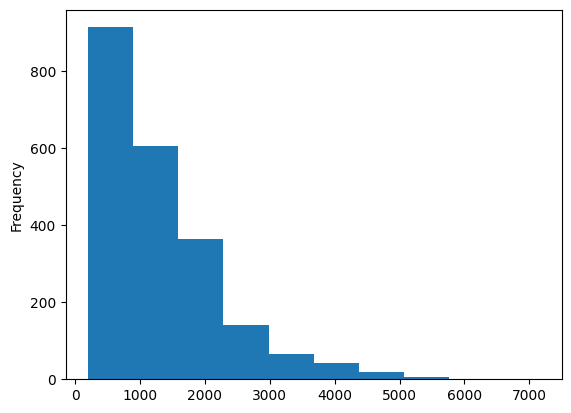

In [10]:
# Focused EDA:
# Look at the final_price variable. Does it have a long tail? Plot the tail
df['final_price'].plot(kind='hist')

In [5]:
# Q2. What's the median (50% percentile) for variable 'ram'?
df['ram'].median()

16.0

In [5]:
# Prepare and split the dataset:
# Shuffle the dataset (the filtered one you created above), use seed 42
df = df.sample(frac=1, random_state=42)
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df.iloc[:int(len(df)*0.6)]
df_val = df.iloc[int(len(df)*0.6):int(len(df)*0.8)]
df_test = df.iloc[int(len(df)*0.8):]

In [26]:
# Q3. Deal Missing Values & Fit Linear Regression without Regularization
def fill_miss(df, fill_mean = False, col_name = 'screen'):
  if fill_mean:
    df.loc[:, col_name] = df[col_name].fillna(df[col_name].mean())
  else:
    df.loc[:, col_name] = df[col_name].fillna(0)

  return df

def fit_reg_rmse(df_train, df_val, reg = False):
  X_train = df_train.drop('final_price', axis=1)
  y_train = df_train['final_price'].values

  if reg:
    # Code later
    rmse = 0
  else:
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(df_val.drop('final_price', axis=1))
    rmse = root_mean_squared_error(df_val['final_price'].values, y_pred)

  return np.round(rmse,3)

fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_val, fill_mean = False))
fit_reg_rmse(fill_miss(df_train, fill_mean = True), fill_miss(df_val, fill_mean = True))

613.791

613.791

In [39]:
# Q5. Random Seed affect on Regression Model performance:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
  df = df.sample(frac=1, random_state=seed)
  df_train = df.iloc[:int(len(df)*0.6)]
  df_val = df.iloc[int(len(df)*0.6):int(len(df)*0.8)]

  scores.append(fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_val, fill_mean = False)))

scores
np.round(np.std(scores),3)

[626.108,
 622.142,
 556.79,
 596.14,
 605.773,
 567.176,
 617.027,
 613.369,
 547.645,
 642.879]

30.349

In [40]:
# Q6. RMSE on Test with seed = 9
df = df.sample(frac=1, random_state=9)
df_train = df.iloc[:int(len(df)*0.8)]
df_test = df.iloc[int(len(df)*0.8):]

fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_test, fill_mean = False))

608.597

# (2) SPARK

In [ ]:
#install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#create java home variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#download SPARK (NEW DOWNLOAD LINK)
!wget -q http://apache.osuosl.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [ ]:
#extract the spark file to the current folder
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
#create spark home variable
import os
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
#install findspark
#findspark searches pyspark installation on the server
#and adds PySpark installation path to sys.path at runtime
#so that PySpark modules can be imported

!pip install -q findspark

In [ ]:
#import findspark
import findspark
findspark.init()

In [ ]:
#import pyspark (added by findspark during runtime)
import pyspark

In [ ]:
#import sparksession
from pyspark.sql import SparkSession

In [ ]:
#create sparksession object and provide appName
spark=SparkSession.builder.appName("local[*]").getOrCreate()

In [ ]:
#print spark version
print("Apache Spark version: ", spark.version)

Apache Spark version:  3.3.1


In [ ]:
#create sample data for spark
data = [("James","","Smith",30,"M",60000),
        ("Michael","Rose","",50,"M",70000),
        ("Robert","","Williams",42,"",400000),
        ("Maria","Anne","Jones",38,"F",500000),
        ("Jen","Mary","Brown",45,"F",0)]

columns = ["first_name","middle_name","last_name","Age","gender","salary"]
pysparkDF = spark.createDataFrame(data = data, schema = columns)
pysparkDF.printSchema()
pysparkDF.show(truncate=False)

root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+---+------+------+
|first_name|middle_name|last_name|Age|gender|salary|
+----------+-----------+---------+---+------+------+
|James     |           |Smith    |30 |M     |60000 |
|Michael   |Rose       |         |50 |M     |70000 |
|Robert    |           |Williams |42 |      |400000|
|Maria     |Anne       |Jones    |38 |F     |500000|
|Jen       |Mary       |Brown    |45 |F     |0     |
+----------+-----------+---------+---+------+------+



In [ ]:
from pyspark.sql.functions import mean, col, max
#Example 1
df2=pysparkDF.select(mean("age"),mean("salary")).show()
#Example 2
pysparkDF.groupBy("gender") \
         .agg(mean("age"),mean("salary"),max("salary")) \
         .show()

+--------+-----------+
|avg(age)|avg(salary)|
+--------+-----------+
|    41.0|   206000.0|
+--------+-----------+

+------+--------+-----------+-----------+
|gender|avg(age)|avg(salary)|max(salary)|
+------+--------+-----------+-----------+
|     M|    40.0|    65000.0|      70000|
|     F|    41.5|   250000.0|     500000|
|      |    42.0|   400000.0|     400000|
+------+--------+-----------+-----------+

